# 100 years $V(\lambda)$ and the future
## Different candidates for different target functions?


In [1]:
from scipy import rand

# temp import only
from empir19nrm02.tools.help import strd, label_font_size, plot_cmf2, save_fig, get_target, label_management, \
    quantil, display_responsivity

#%run -i jhelp


import luxpy as lx
import numpy as np
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression

from empir19nrm02.f1prime import py_f1PrimeGlx
from empir19nrm02.tools import plotCorrMatrixSmall
%matplotlib inline
from luxpy import _CMF, plot_spectrum_colors
from luxpy.color.utils import plot_cmfs, plot_color_data
from luxpy.toolboxes.photbiochem import _BLH, Km_correction_factor
from luxpy.toolboxes.photbiochem import _ACTIONSPECTRA_CIES026
from luxpy.toolboxes.indvcmf import add_to_cmf_dict
from luxpy.spectrum import spd_to_xyz

from empir19nrm02 import _SPD, _RES
from empir19nrm02.tools.help import display_color_diagram, display_spectra

print('Version of luxpy:', lx.__version__)
out_dir = 'VLambda100'

import os
print( 'CWD:', os.getcwd())


E:\TTBV\Python\luxpy\luxpy\spectrum\basics\illuminants.py:512: RankWarning: Polyfit may be poorly conditioned
  xy, pxy, pxT_l7, pxT_L7, l7, L7 = _get_daylightlocus_parameters(ccts, spds, cieobs_)


Version of luxpy: v1.10.0
CWD: E:\TTBV\Python\empir19nrm02\empir19nrm02\Jupyter


### There are different target functions defined by the CIE and others in the past

In [2]:
print (_CMF['types'])

['1931_2', '1964_10', '2006_2', '2006_10', '2015_2', '2015_10', '1931_2_judd1951', '1931_2_juddvos1978', '1951_20_scotopic', '2006_TUIL_2', '2006_TUIL_10', '2006_UP_2', '1988_2', 'cie_std_dev_obs_f1']


### CIE86:1990, Corr. 1:2005, “CIE 1988 2° SPECTRAL LUMINOUS EFFICIENCY FUNCTION FOR PHOTOPIC VISION” CIE, Vienna, Austria, 1990/20058. <https://doi.org/10.25039/TR.086.1990>  

In [17]:
# to make some things a little bit easier for the dispay replace nan by 0
for cmf in _CMF['types']:
    _CMF[cmf]['bar'][np.isnan(_CMF[cmf]['bar'])] = 0

Select some CMF for comparison only

In [18]:
cmfSelection = ['1931_2', '1988_2', '2006_2', '2006_TUIL_2', '2006_UP_2']

In [5]:
# generate a dictionary with the color matching functions names
colorIndex = ['g','b','r','c','m','y','k','g-','b-','r-','c-','m-','y-','k-']
namesIndex = ['V_{1931}','V_{\mathrm{CIE1964}}','V_{\mathrm{CIE2006,2}}','V_{\mathrm{CIE2006,10}}','V_{\mathrm{CIE2015,2}}','V_{\mathrm{CIE2015,10}}','V_{\mathrm{Judd1951}}','V_{\mathrm{JuddVos1978}}','V^{\prime}','V_{\mathrm{TUIL,2}}','V_{\mathrm{TUIL,10}}','V_{\mathrm{UP}}','V_{\mathrm{M}}','k-']

colorData = {}
for i, cmf in enumerate(_CMF['types']):
    colorData[cmf]  = {'color': colorIndex[i],'name': namesIndex[i]}

# Compare the CMF for the different functions

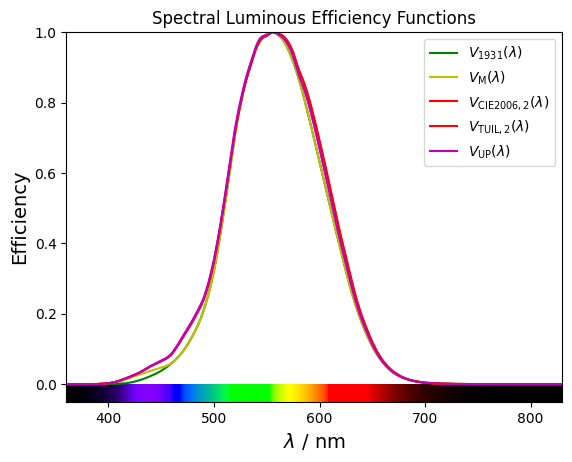

In [19]:
ax = plot_cmf2( name=cmfSelection[0], cmf_symbols=[colorData[cmfSelection[0]]['name']], cmf_colors = [colorData[cmfSelection[0]]['color']],  single=True)
for cmfTmp in cmfSelection[1:]:
    plot_cmf2( ax=ax, name=cmfTmp, cmf_symbols=[colorData[cmfTmp]['name']], cmf_colors = [colorData[cmfTmp]['color']], single=True) 
ax.set_xlabel(strd['xlambda'], fontsize=label_font_size)
ax.set_ylabel('Efficiency', fontsize=label_font_size)
ax.set_title('Spectral Luminous Efficiency Functions')
save_fig( out_dir, 'VL_Comparison')

In [7]:
def plot_cmf2_diff( ax=None, name1 = '1931_2', name2= '2006_2', cmf_symbols = ['x', 'y', 'z'], cmf_colors = ['r-', 'g-','b-'], single = False, spectrum_color = True, xlim=None, rel=False):
    if ax is None:
        fig, ax = pyplot.subplots()
    if single:
        if rel:
            ax.plot(_CMF[name1]['bar'][0], (_CMF[name1]['bar'][2]-_CMF[name2]['bar'][2])/_CMF[name1]['bar'][2]*100, cmf_colors[0],  label='$'+ cmf_symbols[0] + 
                '(\lambda)$')
        else:
            ax.plot(_CMF[name1]['bar'][0], _CMF[name1]['bar'][2]-_CMF[name2]['bar'][2], cmf_colors[0],  label='$'+ cmf_symbols[0] + 
                '(\lambda)$')
    else:
        ax.plot(_CMF[name1]['bar'][0], _CMF[name1]['bar'][1]-_CMF[name2]['bar'][1], cmf_colors[0],  label=r'$\bar{'+cmf_symbols[0]+'}'+'(\lambda)$', lw=0.5)
        ax.plot(_CMF[name1]['bar'][0], _CMF[name1]['bar'][2]-_CMF[name2]['bar'][2], cmf_colors[1],  label=r'$\bar{'+cmf_symbols[1]+'}'+'(\lambda)$', lw=0.5)
        ax.plot(_CMF[name1]['bar'][0], _CMF[name1]['bar'][2]-_CMF[name2]['bar'][2], cmf_colors[2],  label=r'$\bar{'+cmf_symbols[2]+'}'+'(\lambda)$', lw=0.5)
    
    ax.set_xlabel(strd['xlambda'], fontsize=label_font_size)
    if rel:
        ax.set_ylabel('rel. Difference / %', fontsize=label_font_size)
    else:
        ax.set_ylabel('abs. Differece', fontsize=label_font_size)
    ax.legend()
    return ax


# Plotting

Plot the target function and the CIE1931_2° function

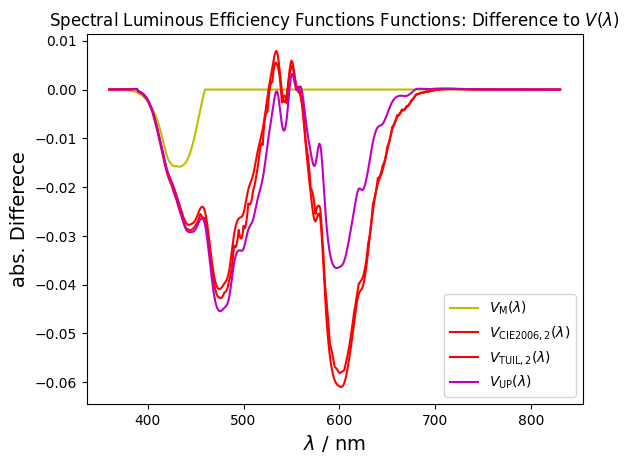

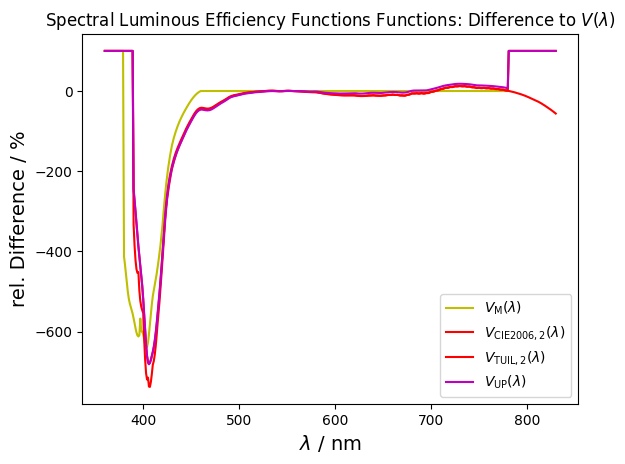

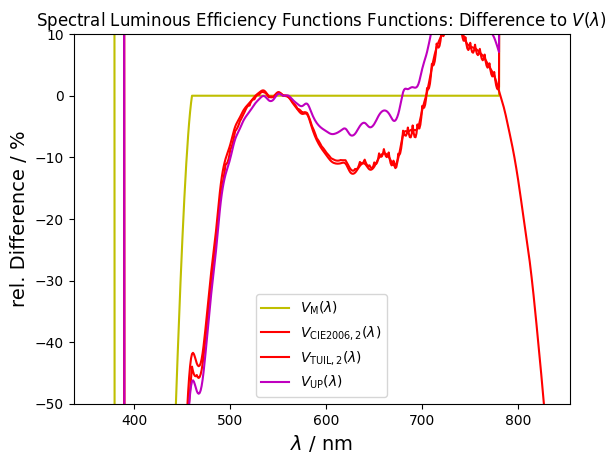

In [21]:
def plot_diff(rel=True, ylim=None):
    ax = plot_cmf2_diff( name1=cmfSelection[0], name2=cmfSelection[1],cmf_symbols=[colorData[cmfSelection[1]]['name']],cmf_colors=[colorData[cmfSelection[1]]['color']],  single=True, rel=rel)
    for cmfTmp in cmfSelection[2:]:
        plot_cmf2_diff( ax=ax, name1='1931_2', name2=cmfTmp, cmf_symbols=[colorData[cmfTmp]['name']], 
        cmf_colors = [colorData[cmfTmp]['color']],  single=True, rel=rel)
    ax.set_title('Spectral Luminous Efficiency Functions Functions: Difference to $V(\lambda)$')
    if ylim is not None:
        ax.set_ylim(ylim)
    if rel:
        save_fig( out_dir, 'VL_ComparisonDiffRel')
    else:    
        save_fig( out_dir, 'VL_ComparisonDiffAbs')

plot_diff(rel=False)
plot_diff(rel=True)
plot_diff(rel=True, ylim=(-50,10))



# CMF data base

What is included here (including the new once)?
* Show name
* Plot compared to th CIE_1931_2° standard observer

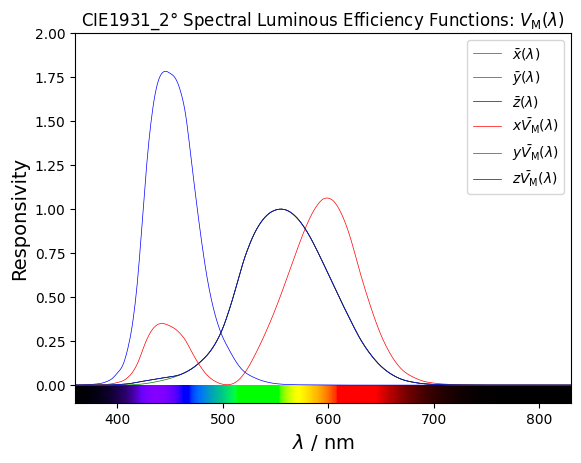

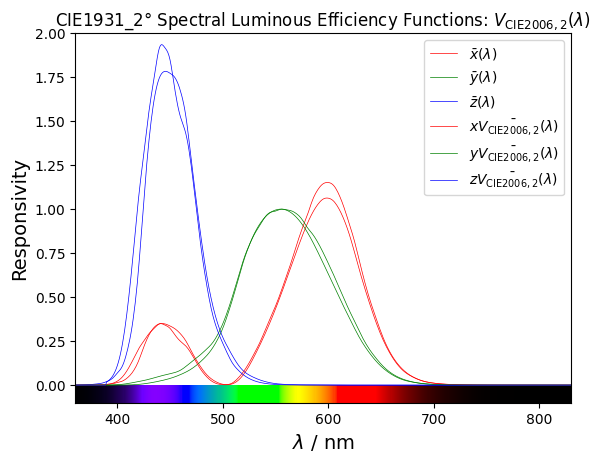

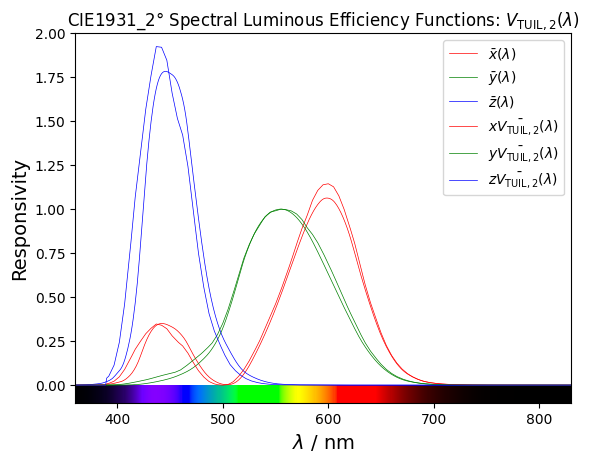

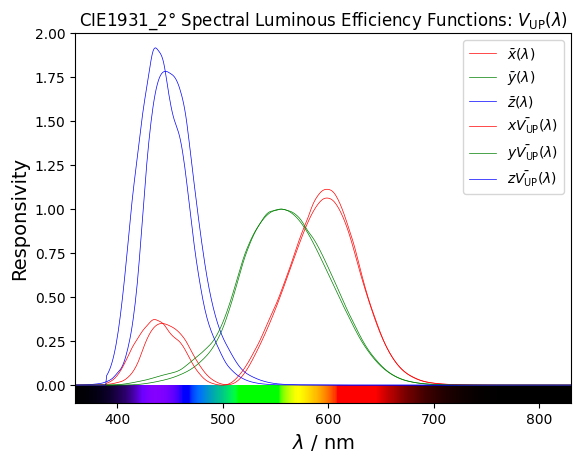

In [22]:
for cmf in cmfSelection[1:]:
    ax = plot_cmf2()
    plot_cmf2(name=cmf, ax=ax, cmf_symbols = ['x'+colorData[cmf]['name'], 'y'+colorData[cmf]['name'], 'z'+colorData[cmf]['name']], spdmax=2)
    ax.set_title('CIE1931_2° Spectral Luminous Efficiency Functions: ' + '$' + colorData[cmf]['name'] + '(\lambda)$')
    save_fig( out_dir, 'VL_' + cmf) 

# SPD data base

What is included here?
* Show name
* Plot selected SD
* plot the color values in a color diagram

SPD data base:
Name: BB 			 Size: 55
Name: PTLED 			 Size: 229
Name: CIES025_PTLED 			 Size: 228
Name: OSRAM_PTLED 			 Size: 137
Name: RGBLED 			 Size: 98
Name: CIES025_RGBLED 			 Size: 97
Name: PHOTOLED 			 Size: 1496


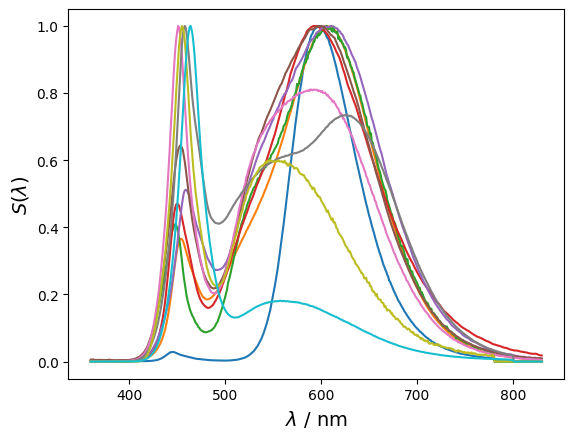

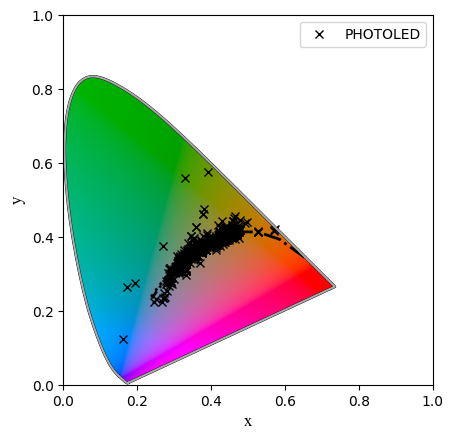

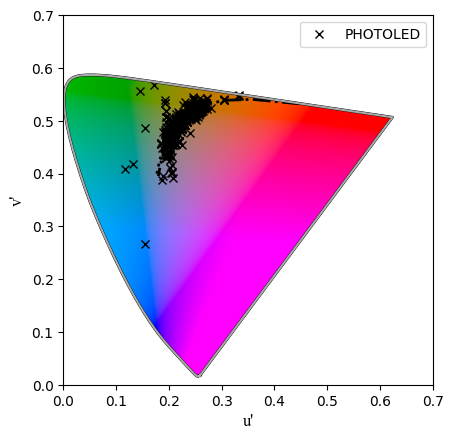

Name: TC2_90 			 Size: 1300
Name: MONOLED 			 Size: 638


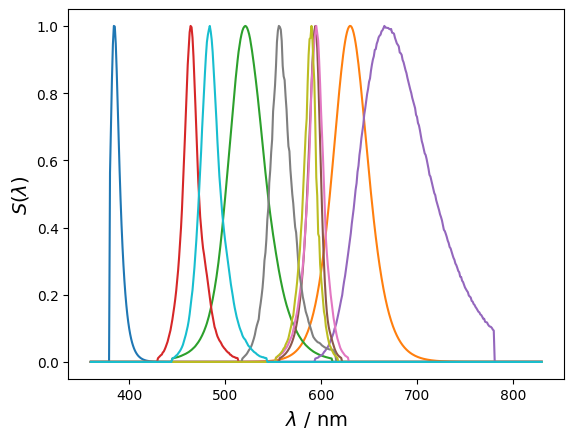

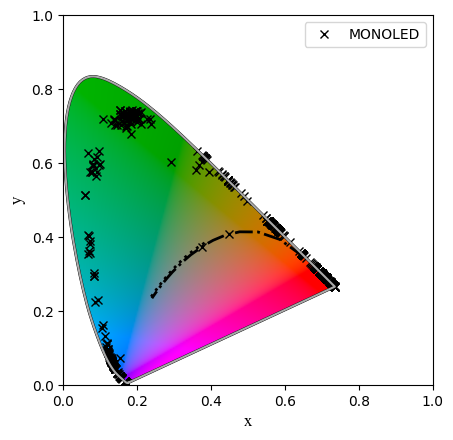

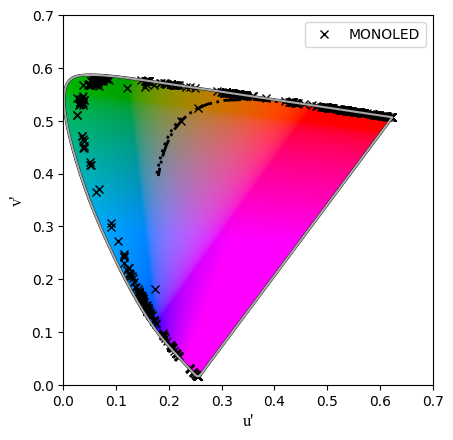

Name: OSRAM_MONOLED 			 Size: 260


In [23]:
print('SPD data base:')
for spd, enable  in _SPD.items():
    print('Name:', spd, '\t\t\t', 'Size:', _SPD[spd]['S']['data'].shape[0]-1)
    _spectra=_SPD[spd]['S']['data'].copy()
    if spd == 'PHOTOLED' or spd == 'MONOLED':
        display_spectra( spd, _spectra, curvenumber=10)
        save_fig(out_dir, spd + '_spectra')

        display_color_diagram(spd, _spectra,cspace='Yxy')
        save_fig(out_dir, spd + '_xy')

        display_color_diagram(spd, _spectra,cspace='Yuv76')
        save_fig(out_dir, spd + '_uv76')

# Comparison

Use the data from PHOTOLED and MONOLED to compare the color values for the 1931_2 and 2006_2 observer

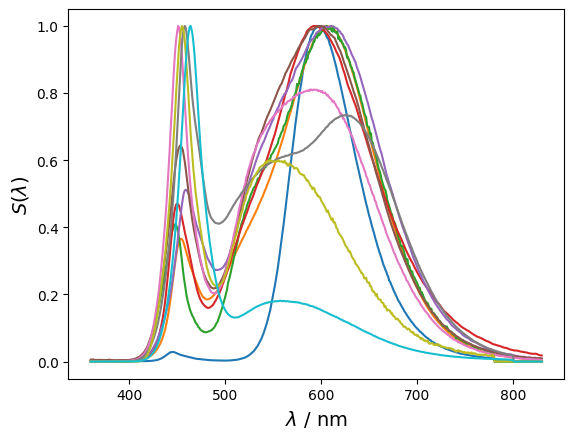

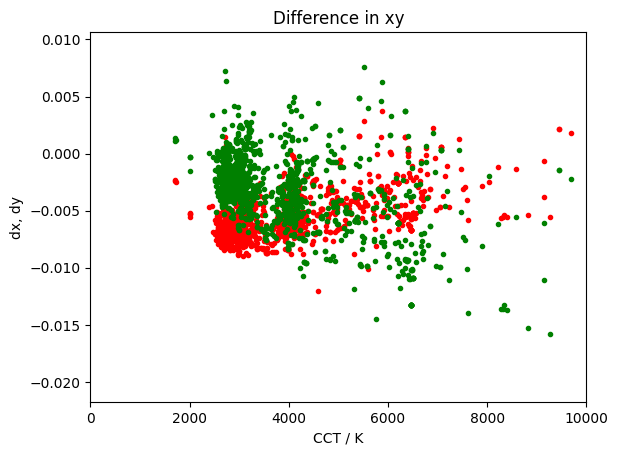

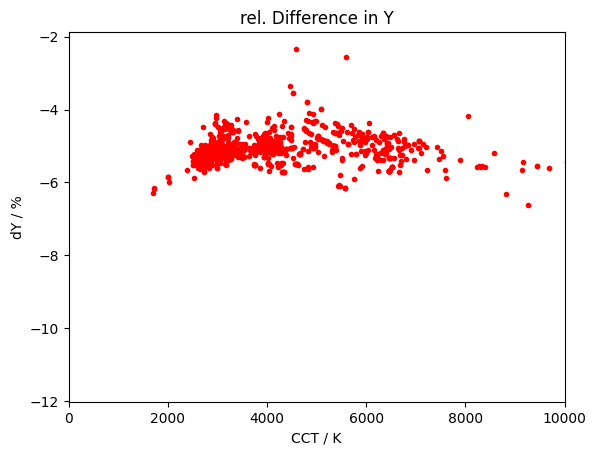

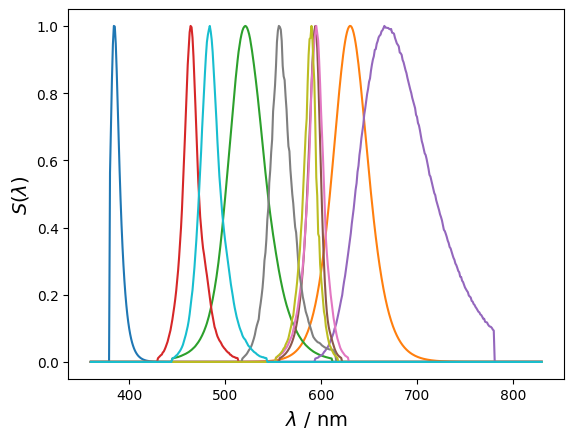

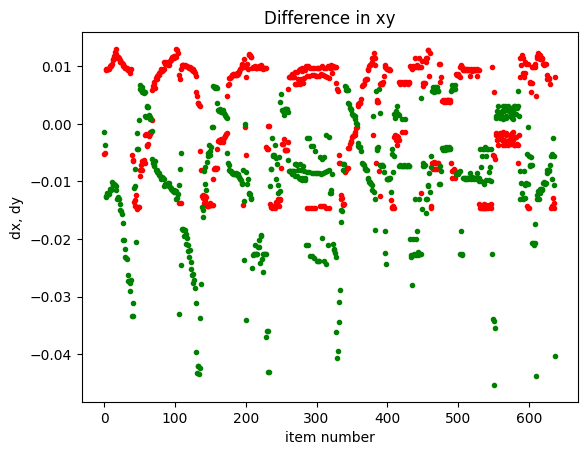

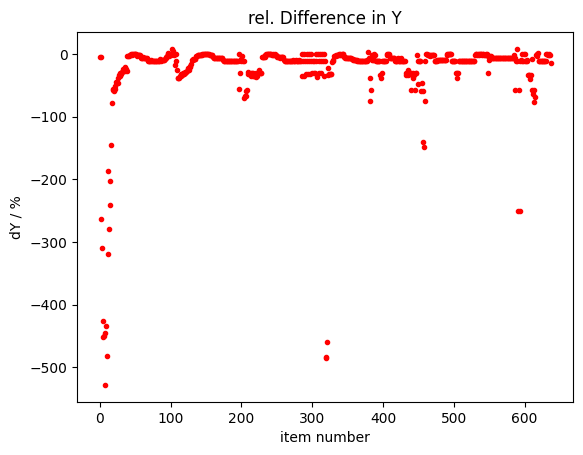

In [24]:
for spd in ['PHOTOLED', 'MONOLED']:
    _spectra=_SPD[spd]['S']['data'].copy()
    display_spectra( spd, _spectra, curvenumber=10)
    save_fig(out_dir, spd + '_sd')
    DataCSpace0=lx.xyz_to_Yxy(lx.spd_to_xyz(_spectra, cieobs='1931_2', relative=False))
    # CCT for reference
    cct = lx.xyz_to_cct(lx.spd_to_xyz(_spectra, cieobs='1931_2'))[:,0]
    DataCSpace1=lx.xyz_to_Yxy(lx.spd_to_xyz(_spectra, cieobs='2006_2', relative=False))

    fig, ax = pyplot.subplots()
    diffData =DataCSpace0- DataCSpace1 
    if 'MONOLED' in spd:
        ax.plot( diffData.T[1], 'r.', label='x')
        ax.plot( diffData.T[2], 'g.', label='y')
        ax.set_xlabel('item number')        
    else:        
        ax.plot( cct, diffData.T[1], 'r.', label='x')
        ax.plot( cct, diffData.T[2], 'g.', label='y')
        ax.set_xlim( (0, 10000))
        ax.set_xlabel('CCT / K')        
    
    ax.set_ylabel('dx, dy')
    ax.set_title('Difference in xy')
    save_fig(out_dir, spd + 'D_xy')
    
    YDiff = (DataCSpace0.T[0]- DataCSpace1.T[0])/DataCSpace0.T[0]*100    
    fig1, ax1 = pyplot.subplots()
    if 'MONOLED' in spd:
        ax1.plot( YDiff, 'r.')
        ax1.set_xlabel('item number')        
    else:        
        ax1.plot( cct, YDiff, 'r.')
        ax1.set_xlim( (0, 10000))
        ax1.set_xlabel('CCT / K')        
    ax1.set_title('rel. Difference in Y')
    ax1.set_ylabel('dY / %')
    save_fig(out_dir, spd + '_Yrel')


# Radiometrie
### Wir nehmen einen schwarzen Strahler und messen die Strahlung

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[8.1350e+04 5.2668e-01 4.1330e-01] [8.6112e+04 5.3100e-01 4.1438e-01]
dx,dy: [-4.3184e-03 -1.0803e-03]
dY: -0.058547066180484386
[7.5555e+04 4.7700e-01 4.1368e-01] [7.9695e+04 4.8229e-01 4.1491e-01]
dx,dy: [-5.2919e-03 -1.2326e-03]
dY: -0.05479068664219827
[7.3209e+04 4.3693e-01 4.0408e-01] [7.7122e+04 4.4196e-01 4.0546e-01]
dx,dy: [-5.0304e-03 -1.3881e-03]
dY: -0.05345375740024556
[7.2234e+04 4.0531e-01 3.9072e-01] [7.6088e+04 4.0954e-01 3.9209e-01]
dx,dy: [-4.2340e-03 -1.3717e-03]
dY: -0.053361236087460996
[7.1882e+04 3.8044e-01 3.7675e-01] [7.5757e+04 3.8373e-01 3.7798e-01]
dx,dy: [-3.2874e-03 -1.2271e-03]
dY: -0.05390552528693582
[7.1834e+04 3.6079e-01 3.6355e-01] [7.5768e+04 3.6315e-01 3.6457e-01]
dx,dy: [-2.3648e-03 -1.0206e-03]
dY: -0.05476460212441837
[7.1940e+04 3.4510e-01 3.5161e-01] [7.5952e+04 3.4664e-01 3.5241e-01]
dx,dy: [-1.5316e-03 -7.9711e-04]
dY: -0.05576320942568424
[7.2121e+04 3.3244e-01 3.4104e-01] [7.6218e+04 3.3324e-01 3.4162e-01]
dx,dy: [-8.0368e-04 -5.8064e-04]

Text(0.5, 1.0, 'Difference in xy')

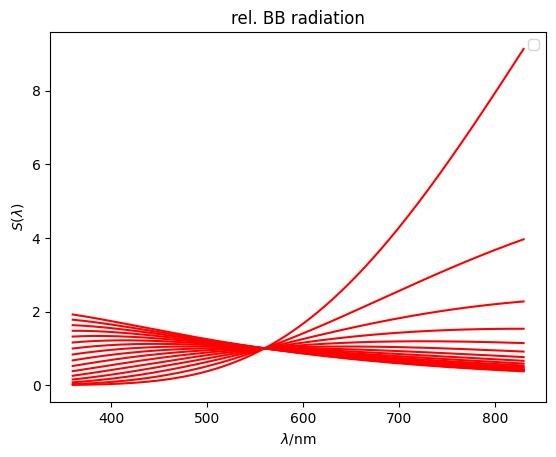

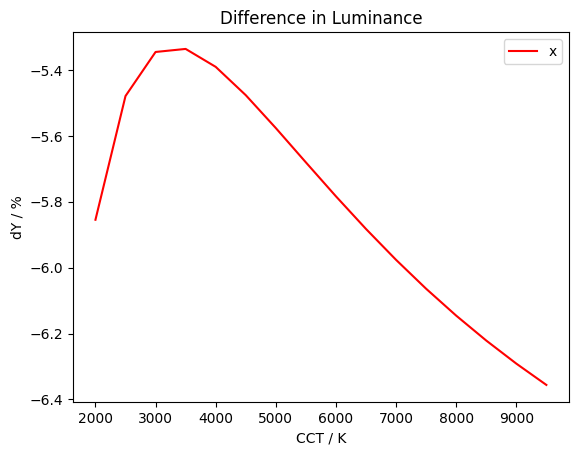

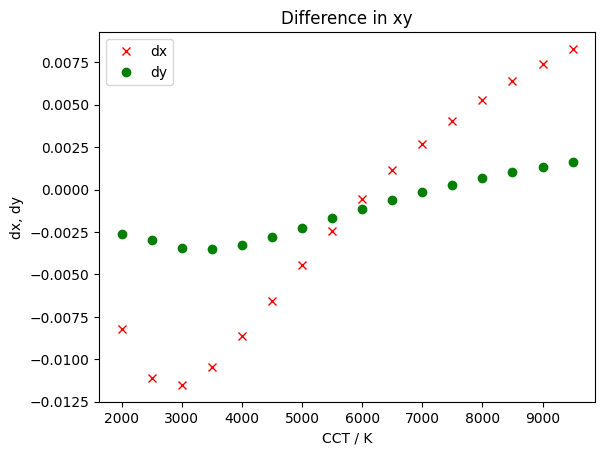

In [47]:
cct_range = [3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
cct_range = np.arange(2000, 10000, 500)
fig, ax = pyplot.subplots()
# lege eine Liste an, um die Werte zu speichern
Yxy_1932_2 = np.zeros((len(cct_range), 3))
Yxy_2006_2 = np.zeros((len(cct_range), 3))
for i, cct in enumerate(cct_range):
    s_bb=lx.blackbody( cct, lx._CMF['1931_2']['bar'][0], relative=True)
    ax.plot( s_bb[0], s_bb[1], 'r-')
    Yxy_1932_2[i] = lx.xyz_to_Yxy(lx.spd_to_xyz(s_bb, cieobs='1931_2', relative=False))
    Yxy_2006_2[i] = lx.xyz_to_Yxy(lx.spd_to_xyz(s_bb, cieobs='2006_2', relative=False))

    # hier stimmen die Werte noch nicht :-(, die Leuchtdichte ist zu hoch
    print( Yxy_1932_2[i], Yxy_2006_2[i])
    print( 'dx,dy:',(Yxy_1932_2[i] - Yxy_2006_2[i])[1:])
    print( 'dY:', ((Yxy_1932_2[i] - Yxy_2006_2[i])/Yxy_1932_2[i])[0])

ax.set_xlabel('$\lambda / \mathrm{nm}$')
ax.set_ylabel('$S(\lambda)$')
ax.legend()
ax.set_title('rel. BB radiation')
    
fig, ax = pyplot.subplots()
dYdata = ((Yxy_1932_2[:] - Yxy_2006_2[:])/Yxy_1932_2[:])[:,0]*100
dx_data = ((Yxy_1932_2[:] - Yxy_2006_2[:])/Yxy_1932_2[:])[:,1]
dy_data = ((Yxy_1932_2[:] - Yxy_2006_2[:])/Yxy_1932_2[:])[:,2]
ax.plot( cct_range, dYdata, 'r-', label='x')
ax.set_xlabel('CCT / K')
ax.set_ylabel('dY / %')
ax.legend()
ax.set_title('Difference in Luminance')

fig, ax = pyplot.subplots()
ax.plot( cct_range, dx_data, 'rx', label='dx')
ax.plot( cct_range, dy_data, 'go', label='dy')
ax.set_xlabel('CCT / K')
ax.set_ylabel('dx, dy')
ax.legend()
ax.set_title('Difference in xy')


# LMS, XYZ Variation

Excample from luxpy_basic_usage.ipynb


In [15]:
cieobs = '1964_10' # set CIE observer, i.e. cmf set
ccts = [3000,4000,4500, 6000] # define M = 4 CCTs
ref_types = ['BB','DL','cierf','DL'] # define reference illuminant types

# calculate reference illuminants:
REF = lx.cri_ref(ccts, ref_type = ref_types, norm_type = 'lambda', norm_f = 560)

print('* REF.shape --> (M + 1 x number of wavelengths): {}'.format(REF.shape)) 

* REF.shape --> (M + 1 x number of wavelengths): (5, 471)


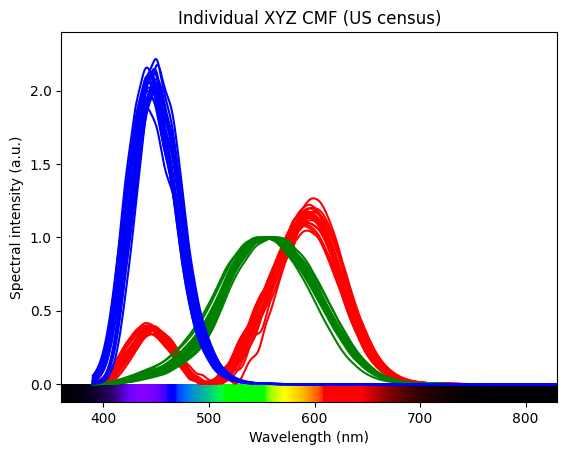

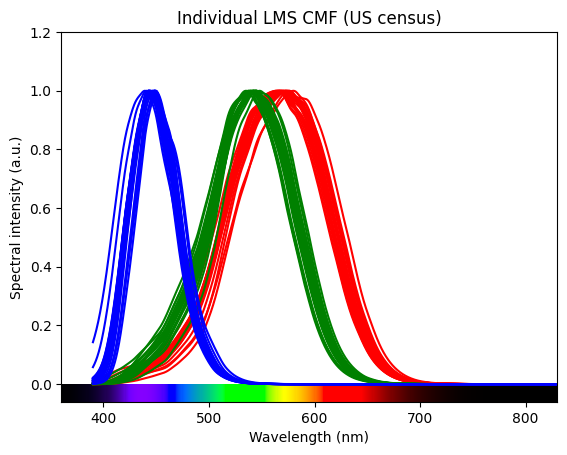

(4, 20, 3)


In [16]:
# Get set of 20 individual observer lms-CMFs 
lmsb = lx.indvcmf.genMonteCarloObs(n_obs = 20, list_Age = [30], fieldsize = 2)

# Use US 2010 population census to generate Age Distribution and output as XYZ CMF:
xyzb_us = lx.indvcmf.genMonteCarloObs(n_obs = 20, list_Age = 'us_census', fieldsize = 6, out ='XYZ')
lmsb_us = lx.indvcmf.genMonteCarloObs(n_obs = 20, list_Age = 'us_census', fieldsize = 6, out ='LMS')

# Plot CMFs:
pyplot.figure()

pyplot.plot(xyzb_us[0],xyzb_us[1], color ='r', linestyle='-')
pyplot.plot(xyzb_us[0],xyzb_us[2], color ='g', linestyle='-')
pyplot.plot(xyzb_us[0],xyzb_us[3], color ='b', linestyle='-')
pyplot.xlabel('Wavelength (nm)')
pyplot.ylabel('XYZbar (area normalized)')
title = 'Individual XYZ CMF (US census)'
pyplot.title(title)
# Add bar with wavelength colors:
lx.plot_spectrum_colors(wavelength_height = -0.05,spdmax = 2.4, axh = pyplot.gca())

save_fig( out_dir, title)

# Plot CMFs:
pyplot.figure()

pyplot.plot(lmsb_us[0],lmsb_us[1], color ='r', linestyle='-')
pyplot.plot(lmsb_us[0],lmsb_us[2], color ='g', linestyle='-')
pyplot.plot(lmsb_us[0],lmsb_us[3], color ='b', linestyle='-')
pyplot.xlabel('Wavelength (nm)')
pyplot.ylabel('LMSbar (area normalized)')
title = 'Individual LMS CMF (US census)'
pyplot.title(title)
# Add bar with wavelength colors:
lx.plot_spectrum_colors(wavelength_height = -0.05,spdmax = 1.2, axh = pyplot.gca())
save_fig( out_dir, title)


# CalculateXYZ values for REF:
xyz_ind = np.empty((REF.shape[0]-1, xyzb_us.shape[-1],3))
for i in range(xyzb_us.shape[-1]):
    xyz_ind[:,i,:] = lx.spd_to_xyz(REF, cieobs = xyzb_us[...,i],relative = True)
print(xyz_ind.shape)